In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

## Q1.Delivery_time -> Predict delivery time using sorting time

In [43]:
df=pd.read_csv('D:\ExcelR\Data science\Assignments\Assignment4\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

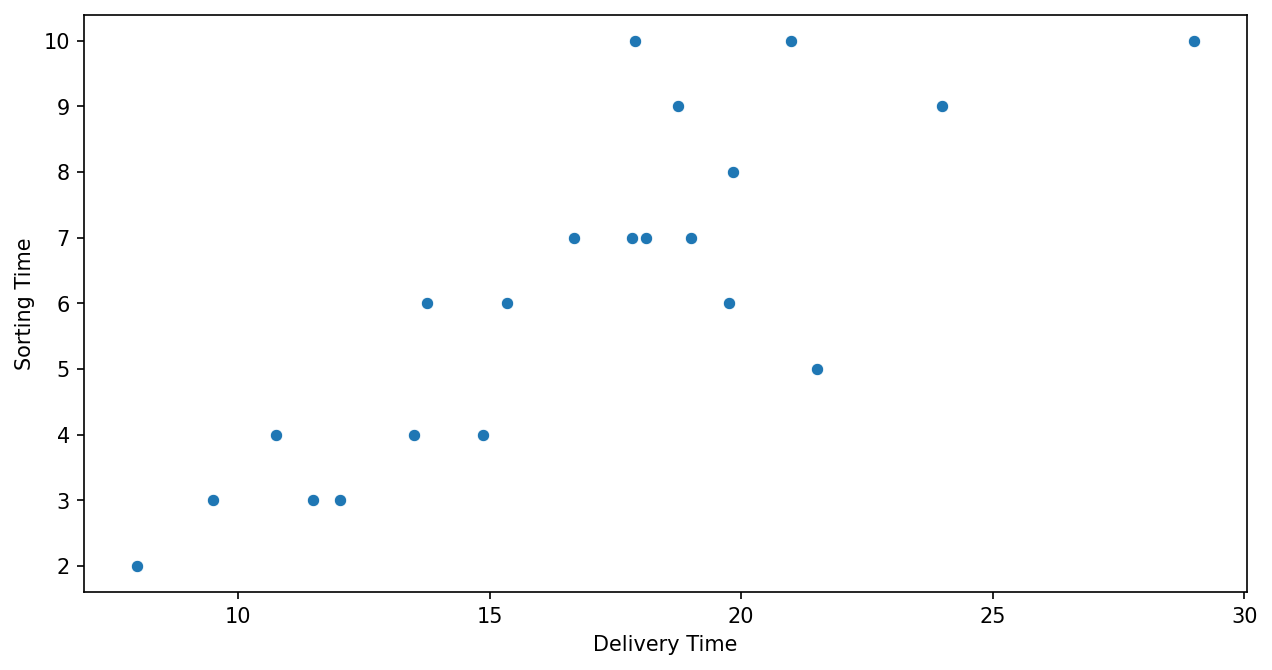

In [44]:
sns.scatterplot(x=df['Delivery Time'],y=df['Sorting Time'])

In [45]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [46]:
import statsmodels.formula.api as smf

In [47]:
data=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [48]:
model1=smf.ols('delivery_time ~ sorting_time',data=data).fit()
model1

In [49]:
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [50]:
#line equation
c = 6.58
m = 1.65
sorting_time = 11
delivery_time = m*sorting_time+c
delivery_time

24.729999999999997

In [51]:
#p value
model1.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [52]:
test = pd.DataFrame({
    'sorting_time' : [1,5,8,6,9]
})
test

,sorting_time
0,1
1,5
2,8
3,6
4,9


In [53]:
model1.predict(test)

0     8.231754
1    14.827833
2    19.774893
3    16.476853
4    21.423913
dtype: float64

In [54]:
# Log Transformation

In [55]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [56]:
data['log_delivery_time'] = np.log(data['delivery_time'])
data['log_sorting_time'] = np.log(data['sorting_time'])
data

,delivery_time,sorting_time,log_delivery_time,log_sorting_time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


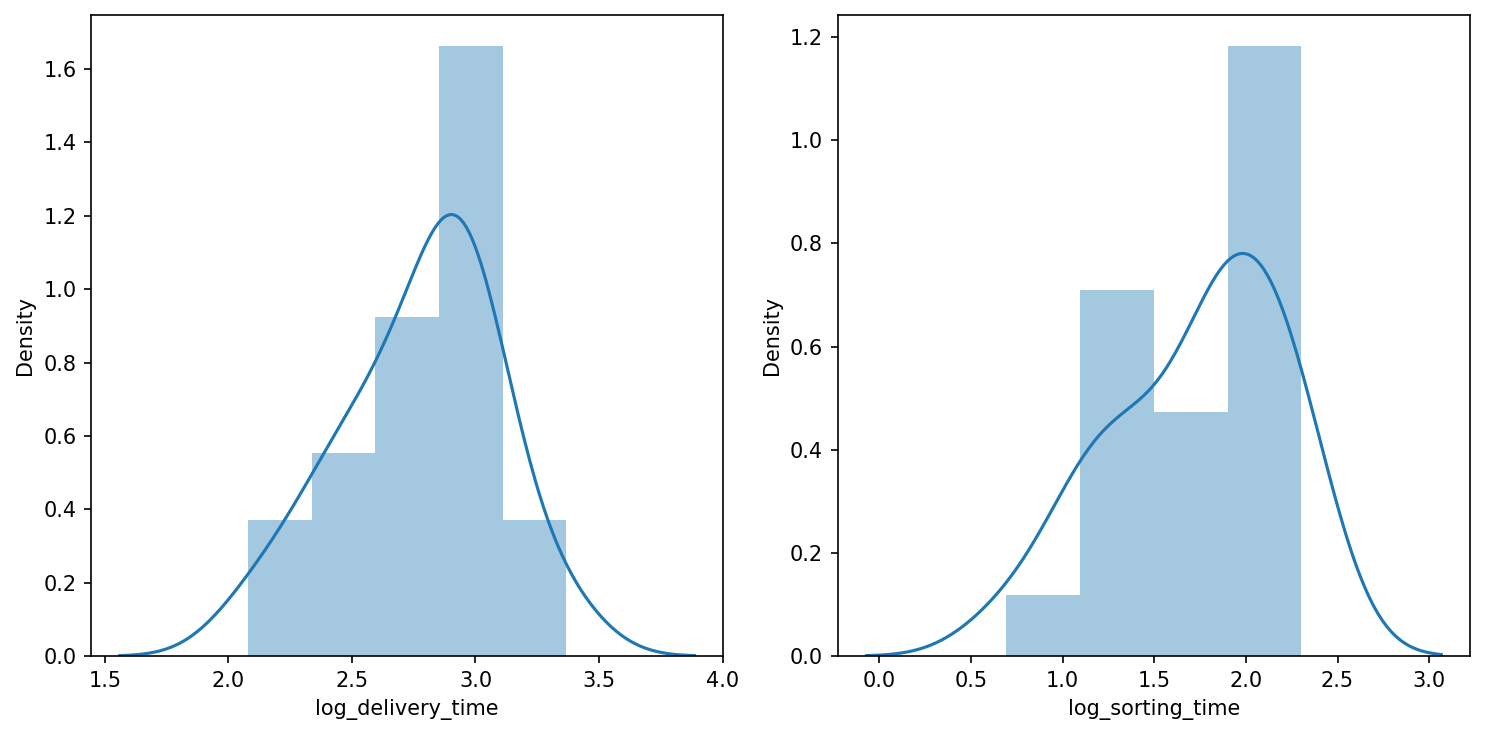

In [57]:
plt.subplot(1,2,1)
sns.distplot(data['log_delivery_time'])

plt.subplot(1,2,2)
sns.distplot(data['log_sorting_time'])

plt.tight_layout()

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

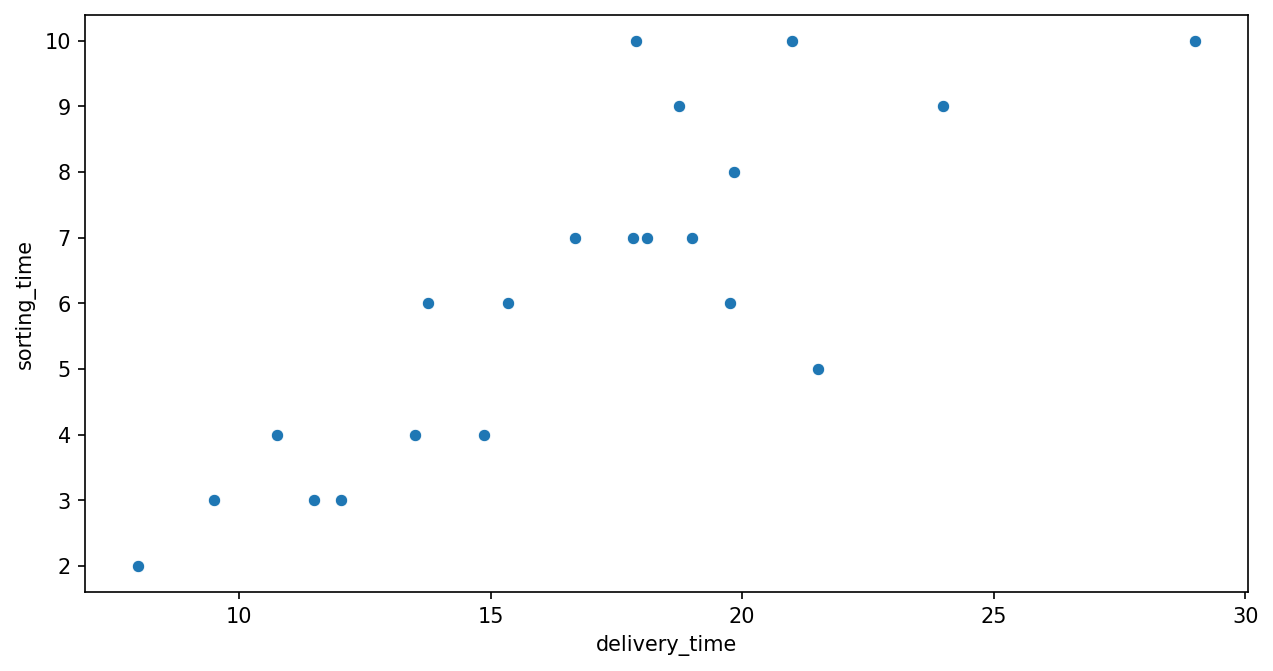

In [58]:
sns.scatterplot(x=data['delivery_time'],y=data['sorting_time'])

In [59]:
data['log_delivery_time'].skew(), data['log_sorting_time'].skew()

(-0.4512901148522999, -0.6052357185134765)

## Q2. Salary_hike -> Build a prediction model for Salary_hike

In [60]:
df=pd.read_csv('D:\ExcelR\Data science\Assignments\Assignment4\Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

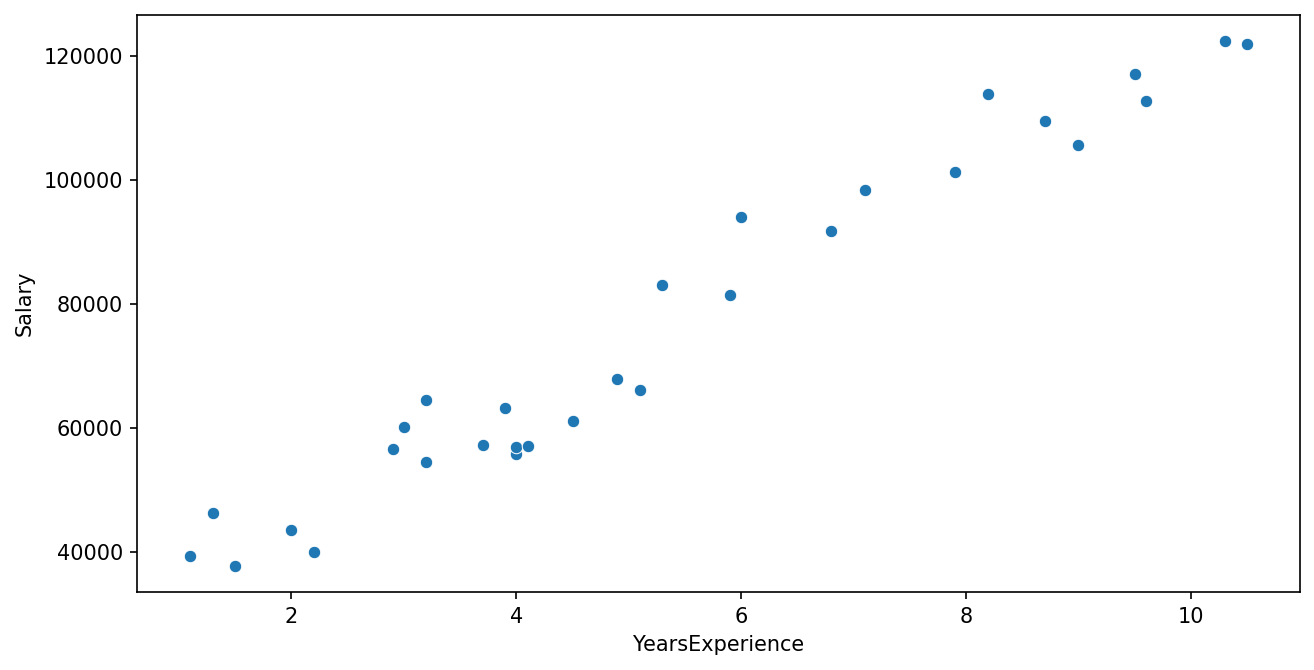

In [61]:
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])

In [62]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [63]:
model2=smf.ols('Salary ~ YearsExperience',data=df).fit()
model

In [64]:
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [65]:
#line equation
c=25792.20
m=9449.96
YearsExperience=10

Salary=m*YearsExperience+c
Salary

120291.79999999999

In [66]:
#p value
model2.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [67]:
test=pd.DataFrame({
    'YearsExperience':[2.3,5.2,0.6,5.9,8.2]
})
test

,YearsExperience
0,2.3
1,5.2
2,0.6
3,5.9
4,8.2


In [69]:
model2.predict(test)

0     47527.113538
1     74932.004270
2     31462.177592
3     81546.977895
4    103281.891235
dtype: float64

In [70]:
#Sqrt Transformation

In [71]:
df['sqrt_YearsExperience'] = np.sqrt(df['YearsExperience'])
df['sqrt_Salary'] = np.sqrt(df['Salary'])
df

,YearsExperience,Salary,sqrt_YearsExperience,sqrt_Salary
0,1.1,39343.0,1.048809,198.350700
1,1.3,46205.0,1.140175,214.953483
2,1.5,37731.0,1.224745,194.244691
3,2.0,43525.0,1.414214,208.626460
4,2.2,39891.0,1.483240,199.727314
5,2.9,56642.0,1.702939,237.995798
6,3.0,60150.0,1.732051,245.254969
7,3.2,54445.0,1.788854,233.334524
8,3.2,64445.0,1.788854,253.860198
9,3.7,57189.0,1.923538,239.142217


<AxesSubplot:xlabel='sqrt_YearsExperience', ylabel='sqrt_Salary'>

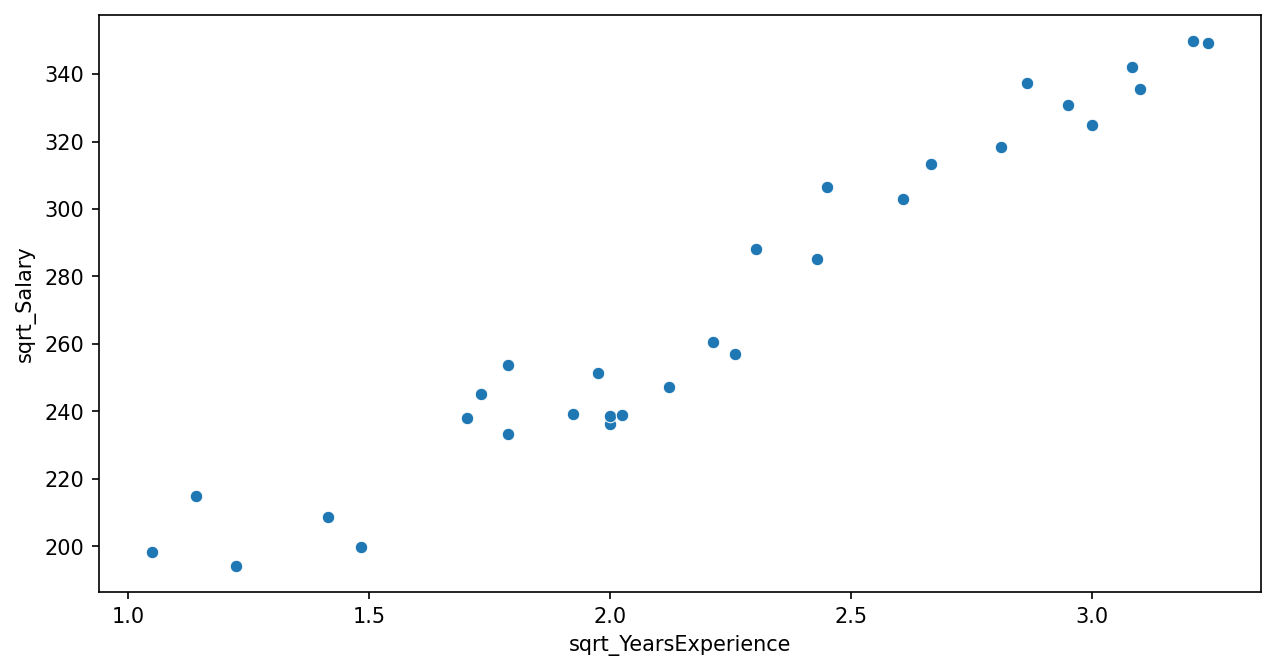

In [72]:
sns.scatterplot(x=df['sqrt_YearsExperience'],y=df['sqrt_Salary'])

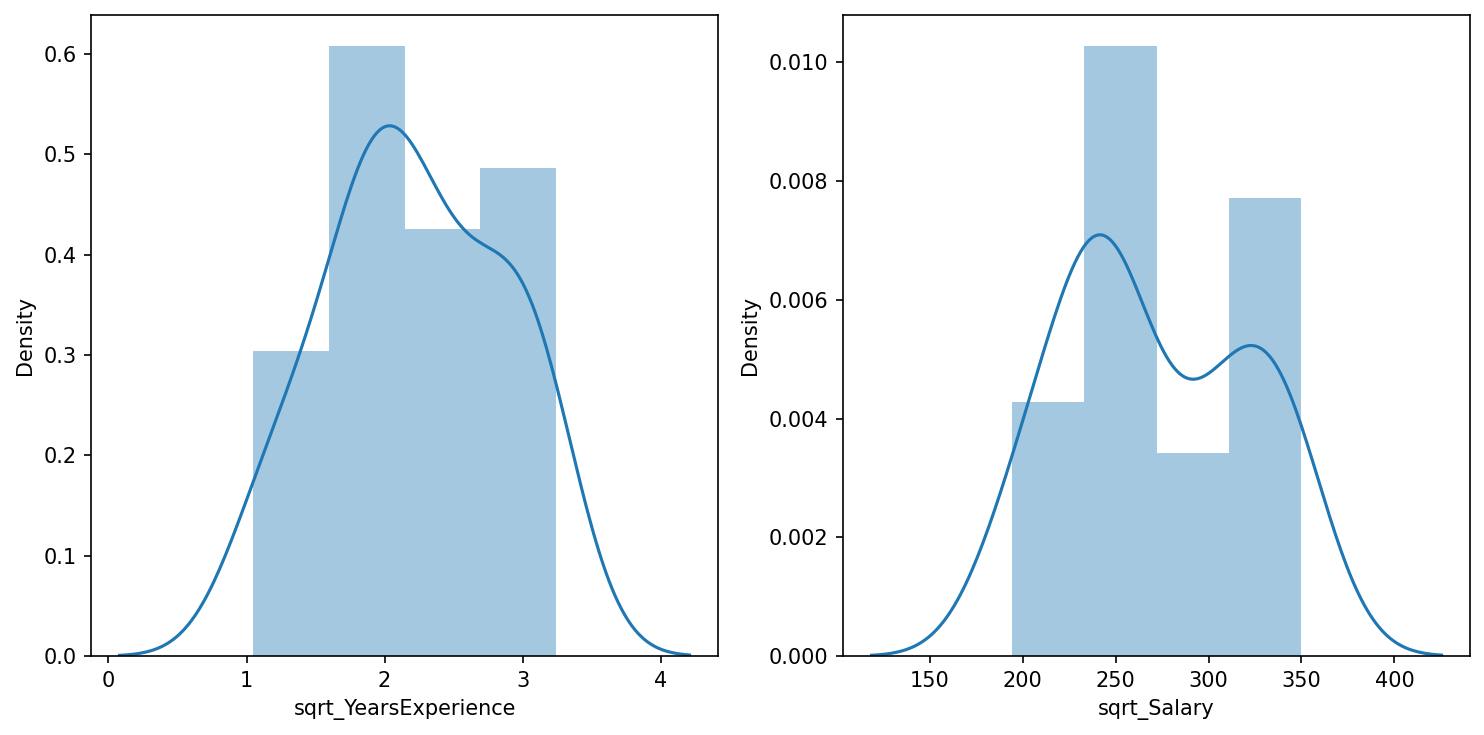

In [73]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_Salary'])

plt.tight_layout()

In [74]:
df['sqrt_YearsExperience'].skew(),df['sqrt_Salary'].skew()

(-0.04919608394250605, 0.16904336802767353)